Data Cleaning

In [15]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'C:\Personal_Projects\projects\Data Science\dunlin_task\Intern_data.csv'
data = pd.read_csv(file_path)

# Handle missing values
data['Memo/Description'].fillna('No Description', inplace=True)

# Correct erroneous data entries in the 'Split' column
data['Split'] = data['Split'].replace('-Split-', np.nan)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Ensure consistency in data types
data['Amount'] = data['Amount'].astype(float)
data['Balance'] = data['Balance'].astype(float)

# Dropping 'Memo/Description' as it's not numeric and not needed for the model
data.drop('Memo/Description', axis=1, inplace=True)

# Display cleaned data
print(data.head())

        Date Transaction Type     Name Split  Amount  Balance
0 2021-05-07          Deposit  EntityC  Cash     9.0      9.0
1 2021-05-07          Deposit  EntityC  Cash    81.0     90.0
2 2021-05-07          Deposit  EntityC   NaN    90.0    180.0
3 2021-05-07          Deposit  EntityC  Cash    81.0    261.0
4 2021-05-07          Deposit  EntityC   NaN    90.0    351.0


C:\Users\dhrub\AppData\Local\Temp\ipykernel_3388\1662507725.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Memo/Description'].fillna('No Description', inplace=True)


Exploratory Data Analysis (EDA)

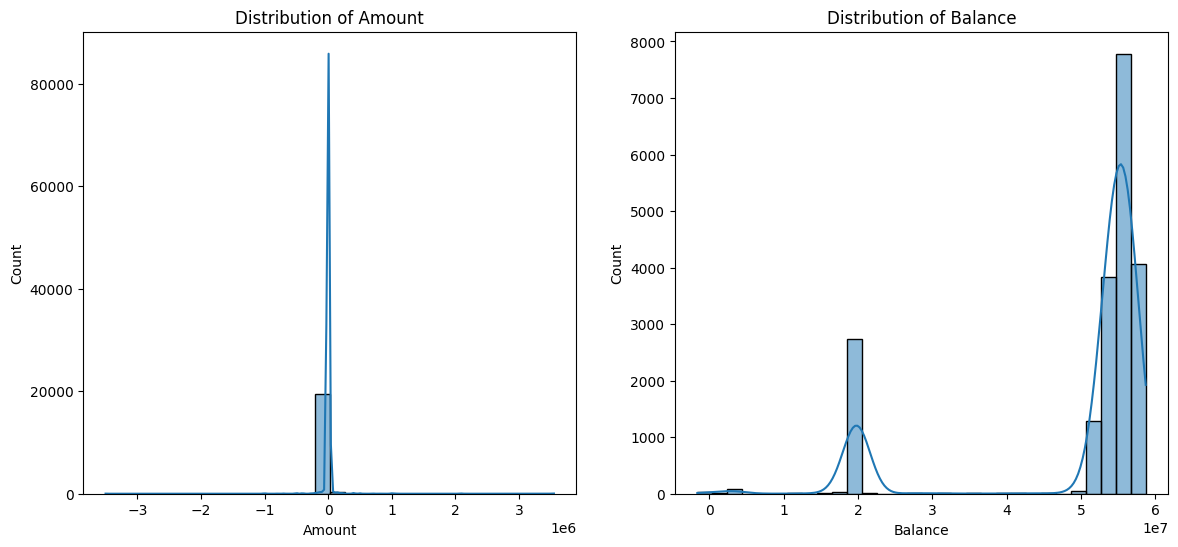

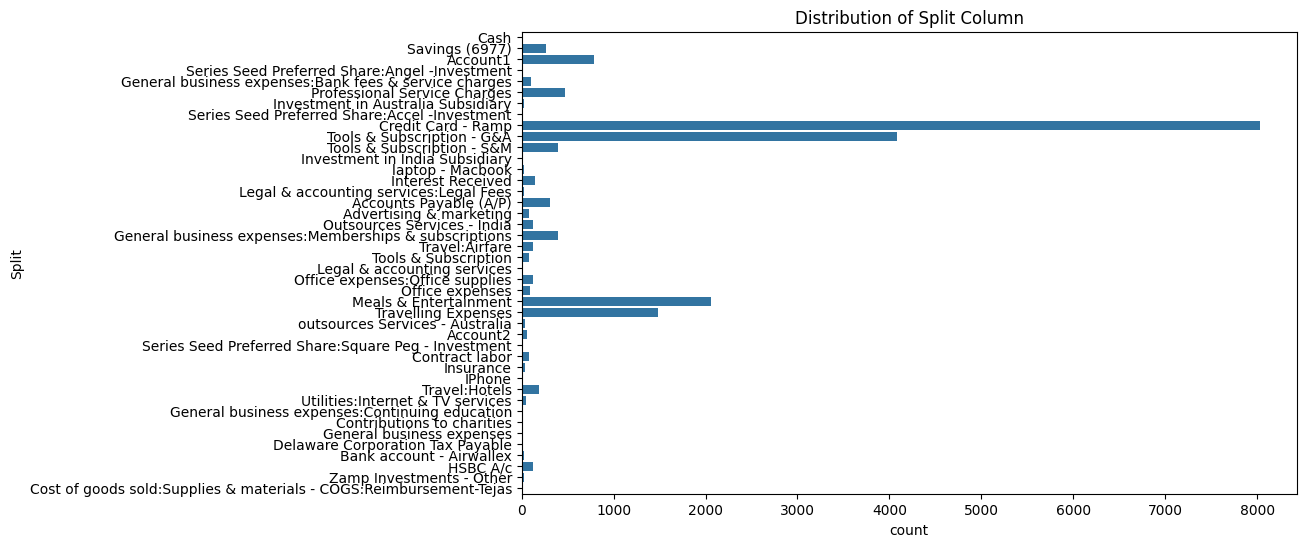

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Amount' and 'Balance'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')

plt.subplot(1, 2, 2)
sns.histplot(data['Balance'], bins=30, kde=True)
plt.title('Distribution of Balance')

plt.show()

# Visualizing 'Split' column
plt.figure(figsize=(10, 6))
sns.countplot(data['Split'])
plt.title('Distribution of Split Column')
plt.show()


Feature Engineering

In [17]:
# Example feature engineering: Extracting day, month, and year from 'Date'
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Dropping the original 'Date' column
data.drop('Date', axis=1, inplace=True)

# Encoding categorical variables
data = pd.get_dummies(data, columns=['Transaction Type', 'Name'])

# Display new features
print(data.head())


  Split  Amount  Balance  Day  Month  Year  Transaction Type_Bill  \
0  Cash     9.0      9.0    7      5  2021                  False   
1  Cash    81.0     90.0    7      5  2021                  False   
2   NaN    90.0    180.0    7      5  2021                  False   
3  Cash    81.0    261.0    7      5  2021                  False   
4   NaN    90.0    351.0    7      5  2021                  False   

   Transaction Type_Bill Payment (Check)  Transaction Type_Credit Card Credit  \
0                                  False                                False   
1                                  False                                False   
2                                  False                                False   
3                                  False                                False   
4                                  False                                False   

   Transaction Type_Credit Card Payment  ...  Name_carta  Name_franzgustav  \
0                   

Model Development

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into features and target
X = data.drop('Split', axis=1)
y = data['Split']

# Handling missing values in target column
X = X[~y.isna()]
y = y.dropna()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choosing and training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


                                                                    precision    recall  f1-score   support

                                                          Account1       0.82      0.79      0.80       151
                                                          Account2       0.36      0.45      0.40        11
                                            Accounts Payable (A/P)       0.41      0.34      0.37        65
                                           Advertising & marketing       0.72      0.76      0.74        17
                                          Bank account - Airwallex       1.00      0.60      0.75         5
                                                              Cash       1.00      1.00      1.00         3
                                                    Contract labor       1.00      1.00      1.00        17
                                        Contributions to charities       0.00      0.00      0.00         2
Cost of goods sold:Supplies

c:\Personal_Projects\projects\Data Science\dunlin_task\.venv_dunlin\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Personal_Projects\projects\Data Science\dunlin_task\.venv_dunlin\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Personal_Projects\projects\Data Science\dunlin_task\.venv_dunlin\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_